In [54]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset: Cause of Deaths around the World (Historical Data)
> #### This Dataset contains Historical Data on Causes of Death around the World
> #### https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world

In [11]:
df = pd.read_csv("datasets/cause_of_deaths.csv", index_col=[0])
df

,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Country/Territory,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,1355,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,1338,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,1312,...,3313,2196,398,2962,2473,2818,2007,4342,654,144


In [12]:
# Se seleccionan datos de America del Sur
df.reset_index(inplace=True)
stringlist = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN']
df_ads = df[df['Code'].str.contains('|'.join(stringlist))]
df_ads = df_ads.set_index("Code")
df_ads.head(20)

,Country/Territory,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Code,,,,,,,,,,,,,,,,,,,,,
ARG,Argentina,1990,772,4983,1494,1323,9,1128,2024,448,...,7096,7129,308,1277,4361,9894,5943,12140,627,107
ARG,Argentina,1991,757,5161,1526,1323,9,1120,2007,433,...,7345,7261,305,1275,4502,10211,5895,12062,645,108
ARG,Argentina,1992,732,5383,1594,1322,8,1108,2105,418,...,7741,7575,300,1272,4679,10766,5961,12201,667,105
ARG,Argentina,1993,731,5609,1644,1303,8,1070,2123,406,...,8026,7788,293,1252,4843,11182,5859,12109,678,103
ARG,Argentina,1994,698,5843,1670,1297,8,1047,2226,372,...,8190,7939,287,1246,4989,11440,5758,11961,682,104
ARG,Argentina,1995,698,6142,1748,1369,7,1015,2173,388,...,8479,8372,286,1314,5082,12171,5806,12112,699,100
ARG,Argentina,1996,693,6439,1818,1452,7,1022,2276,408,...,8693,8856,287,1392,5241,12775,5921,12313,727,93
ARG,Argentina,1997,639,6749,1910,1585,7,1006,2179,396,...,9013,9620,287,1519,5383,13514,6021,12466,744,76
ARG,Argentina,1998,638,7058,2013,1712,7,998,2055,404,...,9456,10446,277,1635,5537,14362,6085,12660,747,66


In [6]:
df_iv = df.pivot_table(index='Code', aggfunc='sum', values='Interpersonal Violence')
df_iv = df_iv.sort_values(by='Interpersonal Violence', ascending=False)
df_iv

,Interpersonal Violence
Code,
BRA,1762967
COL,709555
VEN,266071
ARG,72506
ECU,69274
PER,35797
CHL,25098
PRY,21556
BOL,17062


> En este dataset encontramos diversas causas de muerte, que en principio no tendrían relación, ya que van desde aspectos psico-sociales hasta aspectos hereditarios o accidentales.
> Resultaría interesante analizar los datos agrupando países según algún criterio, como por ejemplo "países de América del Sur", como en la tabla presentada, y a su vez analizar los cambios a través del tiempo.

> Por otro lado, algunas de las "causas" podrían pensarse relacionadas a niveles de desarrollo de los países, como por ejemplo la muerte por malaria. Sería interesante buscar correlaciones entre su descenso/aumento y el descenso/aumento de otras causas.

# 2. Visualización: Matplotlib and Seaborn
> Para esta sección se seleccionarán sólo los valores de Argentina

### a. Matplotlib

In [ ]:
df_ads.reset_index(inplace=True)

In [147]:
# Se seleccionan datos de Argentina
stringlist = ['ARG']
df_arg = df_ads[df_ads['Code'].str.contains('|'.join(stringlist))]
df_arg = df_arg.drop(columns=['Country/Territory'])
df_arg

,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,ARG,1990,772,4983,1494,1323,9,1128,2024,448,...,7096,7129,308,1277,4361,9894,5943,12140,627,107
1,ARG,1991,757,5161,1526,1323,9,1120,2007,433,...,7345,7261,305,1275,4502,10211,5895,12062,645,108
2,ARG,1992,732,5383,1594,1322,8,1108,2105,418,...,7741,7575,300,1272,4679,10766,5961,12201,667,105
3,ARG,1993,731,5609,1644,1303,8,1070,2123,406,...,8026,7788,293,1252,4843,11182,5859,12109,678,103
4,ARG,1994,698,5843,1670,1297,8,1047,2226,372,...,8190,7939,287,1246,4989,11440,5758,11961,682,104
5,ARG,1995,698,6142,1748,1369,7,1015,2173,388,...,8479,8372,286,1314,5082,12171,5806,12112,699,100
6,ARG,1996,693,6439,1818,1452,7,1022,2276,408,...,8693,8856,287,1392,5241,12775,5921,12313,727,93
7,ARG,1997,639,6749,1910,1585,7,1006,2179,396,...,9013,9620,287,1519,5383,13514,6021,12466,744,76
8,ARG,1998,638,7058,2013,1712,7,998,2055,404,...,9456,10446,277,1635,5537,14362,6085,12660,747,66
9,ARG,1999,616,7319,2082,1791,6,973,2169,423,...,9837,11112,280,1703,5556,14948,6100,12796,754,60


#### Lineplot:

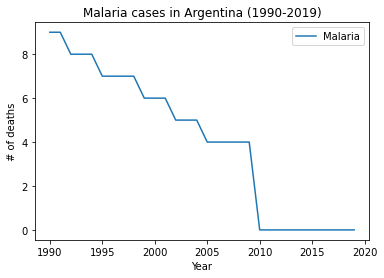

In [148]:
ax = plt.gca()

df_arg.plot(kind='line',x='Year',y='Malaria',ax=ax)

plt.xlabel('Year')
plt.ylabel('# of deaths')
plt.title('Malaria cases in Argentina (1990-2019)')

plt.show()

> En este lineplot vemos cómo las muertes por malaria han ido descendiendo en Argentina, llegando y sosteniéndose en cero desde el año 2010

#### Scatterplot:

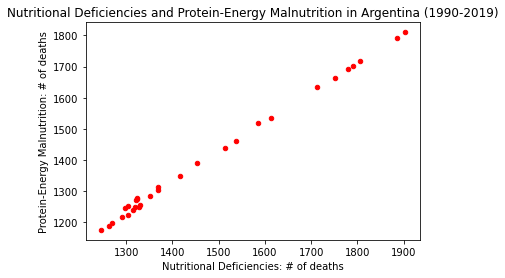

In [171]:
df_arg.plot(kind='scatter',x='Nutritional Deficiencies',y='Protein-Energy Malnutrition',color='red')

plt.xlabel('Nutritional Deficiencies: # of deaths')
plt.ylabel('Protein-Energy Malnutrition: # of deaths')
plt.title('Nutritional Deficiencies and Protein-Energy Malnutrition in Argentina (1990-2019)')

plt.show()

> Se observa una correlación positiva linear entre ambas variables

#### Histplot:

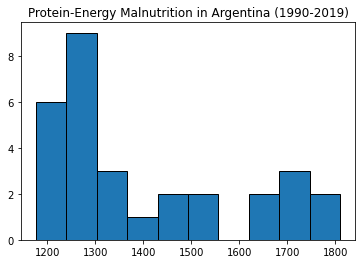

In [174]:
plt.hist(df_arg['Protein-Energy Malnutrition'], edgecolor='black', bins=10)

plt.title('Protein-Energy Malnutrition in Argentina (1990-2019)')

plt.show()

> Se observa una distribución bimodal no-simétrica, es decir que en estos datos habría múltiples modos (dos)

#### Barplot:

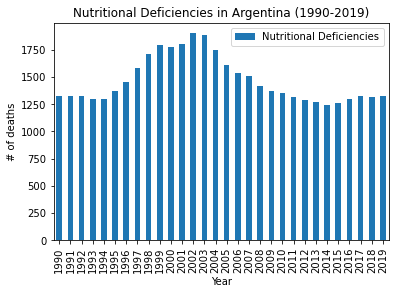

In [151]:
ax = plt.gca()

df_arg.plot(kind='bar',x='Year',y='Nutritional Deficiencies',ax=ax)

plt.xlabel('Year')
plt.ylabel('# of deaths')
plt.title('Nutritional Deficiencies in Argentina (1990-2019)')

plt.show()

> Se observa un aumento significativo en las muertes por deficiencias nutricionales entre los años 1995 y 2002, y un descenso entre los años 2003 y 2014

#### Boxplot:

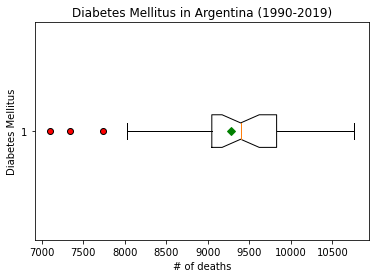

In [152]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
plt.boxplot(x=df_arg['Diabetes Mellitus'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape, notch=True);

plt.xlabel('# of deaths')
plt.ylabel('Diabetes Mellitus')
plt.title('Diabetes Mellitus in Argentina (1990-2019)')

plt.show()

> * En el caso de las muertes por diabetes se observa una distribución simétrica y una mediana cercana a los 9500
> * A su vez se observan una serie de valores anómalos por debajo del mínimo

### b. Seaborn

#### Lineplot:

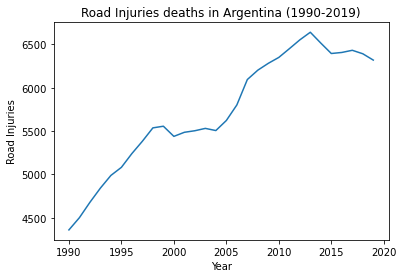

In [153]:
sns.lineplot(
    data=df_arg,
    x="Year", y="Road Injuries"
)
plt.title('Road Injuries deaths in Argentina (1990-2019)')
plt.show()

> En este lineplot vemos cómo las muertes por "lesiones en la carretera" han ido en aumento en Argentina, llegando a un pico previo al año 2015, mostrando luego una tendencia descendente

#### Scatterplot:

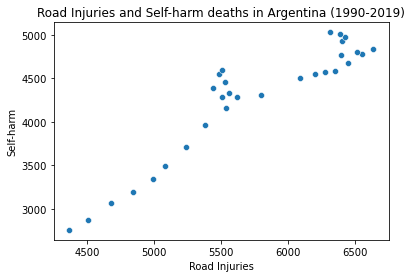

In [178]:
sns.scatterplot(data=df_arg, x="Road Injuries", y="Self-harm")
plt.title('Road Injuries and Self-harm deaths in Argentina (1990-2019)')
plt.show()

> Se observa cierta correlación positiva entre las variables, sin embargo, debemos recordar que correlación no implica causalidad

#### Histplot:

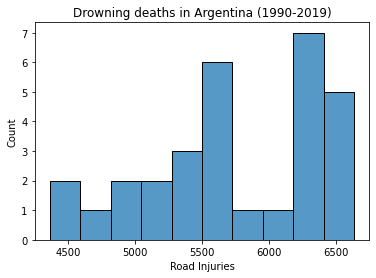

In [186]:
sns.histplot(data=df_arg, x="Road Injuries", bins=10)
plt.title('Drowning deaths in Argentina (1990-2019)')
plt.show()

> Se observa una distribución bimodal no-simétrica, es decir que en estos datos habría múltiples modos (dos)

#### Barplot:

In [164]:
# Human and accidental deaths in Argentina (1990-2019)
df_arg_sum = df_arg.pivot_table(index='Code', aggfunc='sum', values=['Interpersonal Violence', 'Drowning', 'Self-harm', 'Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure', 'Conflict and Terrorism', 'Poisonings', 'Road Injuries', 'Fire, Heat, and Hot Substances'])
df_arg_sum = df_arg_sum.transpose()
df_arg_sum.reset_index(inplace=True)
df_arg_sum.rename(columns={"ARG": "# of deaths", "index": "Cause of death"}, inplace=True)
df_arg_sum.sort_values(by='# of deaths', ascending=False, inplace=True)
#df_arg_sum["mean"] = df_arg_sum["mean"].round()
#df_arg_sum["mean"] = df_arg_sum["mean"].astype("int")
df_arg_sum

Code,Cause of death,# of deaths
7,Road Injuries,172081
8,Self-harm,127809
5,Interpersonal Violence,72506
1,Drowning,24300
4,"Fire, Heat, and Hot Substances",20991
6,Poisonings,8654
2,Environmental Heat and Cold Exposure,1567
0,Conflict and Terrorism,773
3,Exposure to Forces of Nature,425


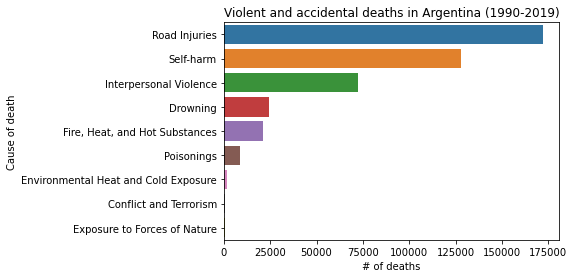

In [165]:
sns.barplot(data=df_arg_sum, x="# of deaths", y="Cause of death")
plt.title('Violent and accidental deaths in Argentina (1990-2019)')
plt.show()

> En esta selección de causas violentas y accidentales observamos que hay tres variables que se destacan del resto:
> * 1. Muertes por "lesiones en la carretera": donde se observan los valores más aumentados
> * 2. Muertes por auto-lesión: la siguiente en magnitud, con valores muy elevados también, aproximadamente 44 mil casos por debajo
> * 3. Muertes por violencia interpersonal: en tercer lugar, con un valor aproximadamente 100 mil casos menor al puesto número uno, a la vez que aproximadamente 16 mil casos por encima de la sumatoria del resto de las variables por debajo

#### Boxplot:

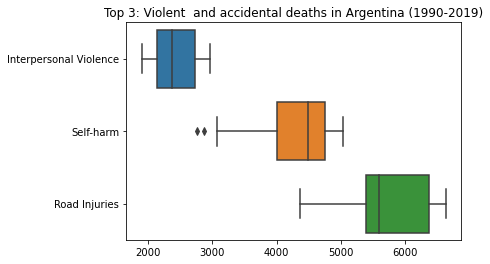

In [187]:
sns.boxplot(
    data=df_arg[['Interpersonal Violence', 'Self-harm', 'Road Injuries']], 
    orient="h"
)
plt.title('Top 3: Violent  and accidental deaths in Argentina (1990-2019)')
plt.show()

> * En el caso de las muertes por violencia interpersonal se observa una distribución simétrica, sin embargo en las muertes por autolesión y "lesiones en la carretera" se observan distribuciones asimétricas negativas
> * En el caso de las muertes por autolesión se observan una serie de valores anómalos por debajo del mínimo